In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [13]:
training_data = pd.read_csv("organized_data_training.csv")

In [14]:
training_data_array = training_data.values

In [15]:
train_x = training_data_array[:, 4:7]
train_y = training_data_array[:,-1:]

In [16]:
model = LinearRegression(fit_intercept=False)

In [17]:
model.fit(train_x, train_y)

LinearRegression(fit_intercept=False)

In [18]:
print("Slope:", model.coef_)

Slope: [[0.09415064 0.05134695 0.56988423]]


In [19]:
test_data = pd.read_csv("organized_data_test.csv")

In [20]:
test_data_array = test_data.values

In [21]:
test_x = test_data_array[:, 4:7]
test_y = test_data_array[:,-1:]

In [22]:
predicted_y = model.predict(test_x)

In [23]:
MAE = mean_squared_error(predicted_y,test_y)

In [24]:
MAE

0.006357934818533983

In [30]:
predicted_y = predicted_y.reshape(len(predicted_y))

In [31]:
ARX_predict_value = pd.Series(predicted_y)
test_data = test_data.assign(ARX_predict_value=ARX_predict_value)

In [32]:
test_data

,day_of_week,hour_of_day,normalized_energy,average_energy,t_3,t_2,t_1,true_value,ARX_predict_value
0,0.0,3.0,0.040404,0.071879,0.040404,0.040404,0.040404,-0.031475,0.028904
1,0.0,4.0,0.040404,0.073287,0.040404,0.040404,0.040404,-0.032883,0.028904
2,0.0,5.0,0.067340,0.076234,0.067340,0.067340,0.067340,-0.008894,0.048174
3,0.0,6.0,0.313131,0.109249,0.313131,0.313131,0.313131,0.203882,0.224008
4,0.0,7.0,0.158249,0.108510,0.158249,0.158249,0.158249,0.049739,0.113209
...,...,...,...,...,...,...,...,...,...
160,6.0,19.0,0.094276,0.159804,0.094276,0.094276,0.094276,-0.065528,0.067443
161,6.0,20.0,0.151515,0.174154,0.151515,0.151515,0.151515,-0.022639,0.108391
162,6.0,21.0,0.175084,0.181300,0.175084,0.175084,0.175084,-0.006216,0.125252
163,6.0,22.0,0.151515,0.162057,0.151515,0.151515,0.151515,-0.010541,0.108391


In [40]:
test_data.to_csv("ARX_predict.csv")

In [34]:
grouped_by_hour = pd.read_csv("grouped_by_hour.csv")

In [35]:
grouped_by_hour

,normalized_energy
0,0.114915
1,0.094641
2,0.081565
3,0.071879
4,0.073287
...,...
163,0.159804
164,0.174154
165,0.181300
166,0.162057


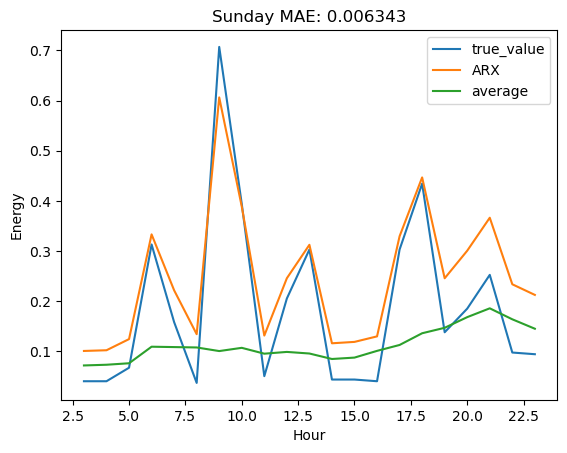

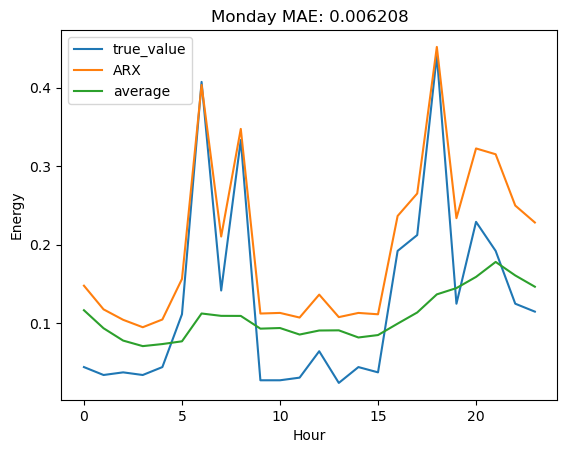

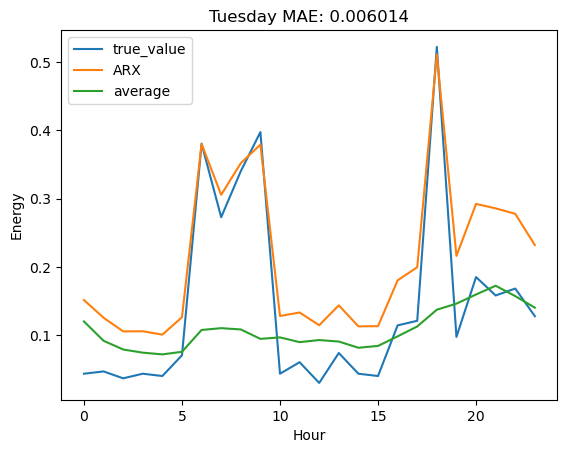

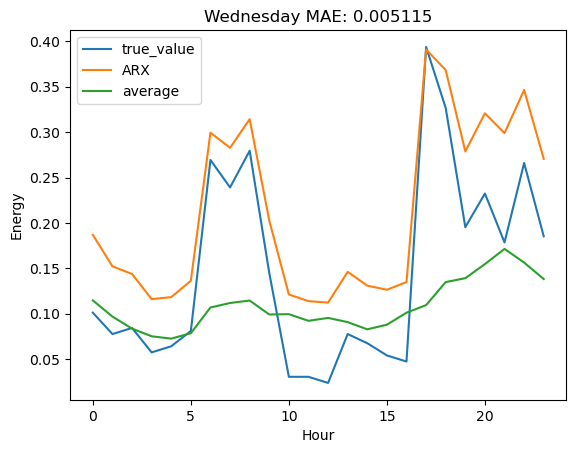

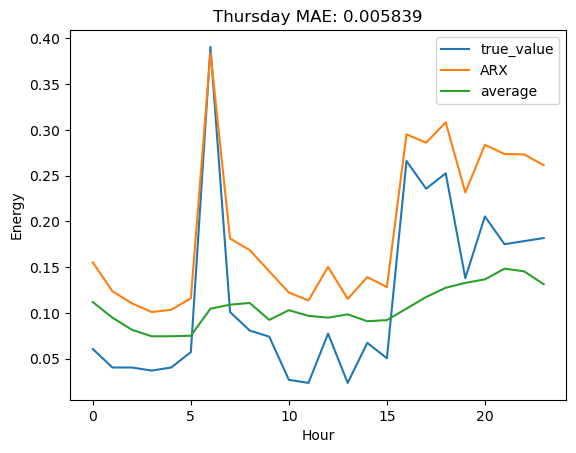

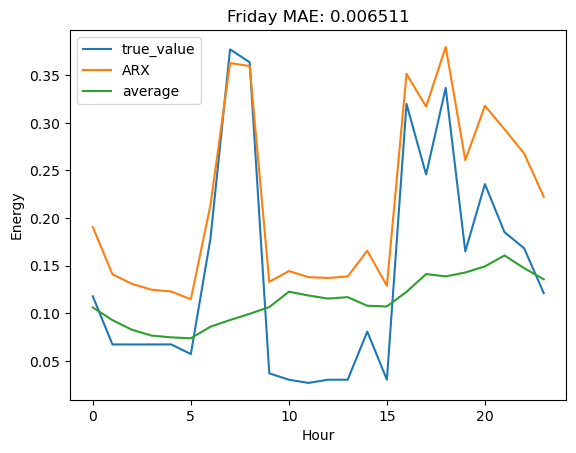

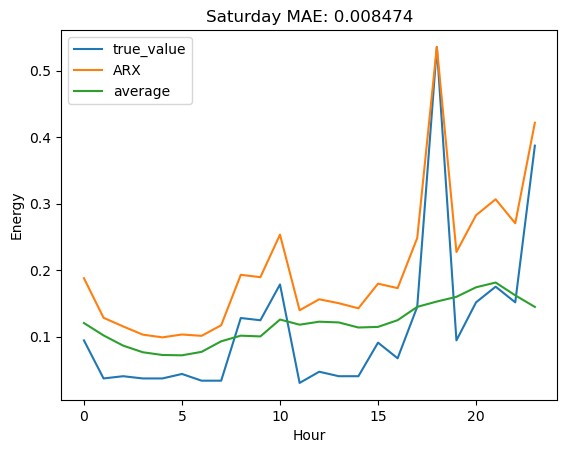

In [43]:
days_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
for i in range(0,7):
    plt.figure()
    if i ==0:
        x = [i for i in range(3,24)]
        y_true_show = test_data[test_data['day_of_week'] == i]['normalized_energy']
        y_ARX_prediction_show = test_data[test_data['day_of_week'] == i]['average_energy'] + test_data[test_data['day_of_week'] == i]['ARX_predict_value']
        y_average = grouped_by_hour[3:24]
    else:
        x = [i for i in range(24)]
        y_true_show = test_data[test_data['day_of_week'] == i]['normalized_energy']
        y_ARX_prediction_show = test_data[test_data['day_of_week'] == i]['average_energy'] + test_data[test_data['day_of_week'] == i]['ARX_predict_value']
        y_average = grouped_by_hour[24*i:24*i+24]
    plt.plot(x, y_true_show,label="true_value")
    plt.plot(x, y_ARX_prediction_show,label = "ARX")
    plt.plot(x, y_average,label="average")
    plt.legend()
    plt.xlabel("Hour")
    plt.ylabel("Energy")
    plt.title(days_dict[i]+" MAE: " +"%f"%mean_squared_error(y_true_show,y_ARX_prediction_show))